# Objective:
The purpose of this notebook is to perform Exploratory Data Analysis on Auto Insurance Claim data. We would like to make sure that the data can be used for the binary classifcation task of if a claim will be made or not for a policy.

## Tasks.
1. Import data. &#9989;
2. Get an initial description of the data. Understand if there's a lot of continous or categorical data. &#9989;
3. Check the quality of the data. Is there a lot of nulls, outliers, etc. &#9989;


The dataset is sourced from https://www.kaggle.com/datasets/litvinenko630/insurance-claims/data , which references the data from https://statso.io/

# Step 1: Import Data and initial transforms and EDA &#9989;
First start out by importing the data and taking a quick look at the summary data and characteristics of it (nulls, types, etc).

1. Import the data. Download the data from https://www.kaggle.com/datasets/litvinenko630/insurance-claims/data and put it in the data folder &#9989;
2. Make sure it can be read. &#9989;
3. Do some initial transforms on the data for data types, such as if some should be categorical. &#9989;

In [1]:
import pandas as pd

claims_df = pd.read_csv('./data/Insurance claims data.csv')

In [2]:
claims_df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [3]:
claims_df.set_index('policy_id', inplace=True)
claims_df['claim_status'] = claims_df['claim_status'].astype('category')

## Step 2: Describe the data.
Let's investigate the data and understand what we're working with.

1. What does the data look like? &#9989;
2. What do the numeric features look like? &#9989;
3. What do the categorical features look like? &#9989;
4. What are some things we might need to watch out for with this dataset? &#9989;

In [4]:
# Looks like a mix of continous and categorical data, far more categorical data than numeric features.
claims_df.dtypes

subscription_length                  float64
vehicle_age                          float64
customer_age                           int64
region_code                           object
region_density                         int64
segment                               object
model                                 object
fuel_type                             object
max_torque                            object
max_power                             object
engine_type                           object
airbags                                int64
is_esc                                object
is_adjustable_steering                object
is_tpms                               object
is_parking_sensors                    object
is_parking_camera                     object
rear_brakes_type                      object
displacement                           int64
cylinder                               int64
transmission_type                     object
steering_type                         object
turning_ra

In [5]:
# Summarize continous data.
claims_df.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000


There's 13 continous features. Some of which are a blend of vehicle features and customer features (including policy details).

There doesn't appear to be any extremes in the data from an eyeball analysis (outliers).

In [6]:
# Summarize categorical and string data
claims_df.describe(include='object')

,region_code,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,...,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,22,6,11,3,9,9,11,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,13654,18314,14948,20532,17796,17796,14948,40191,35526,44574,...,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229


Most of the data appears to be categorical, there's 28 features, we'll need to dig more into these beyond just a basic description.

In [7]:
categorical_columns = claims_df.select_dtypes(include=['category', 'object']).columns

for col in categorical_columns:
    print(f"Column: {col}")
    print(claims_df[col].value_counts())
    print("-" * 30)

Column: region_code
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: region_code, dtype: int64
------------------------------
Column: segment
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
------------------------------
Column: model
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64
------------------------------
Column: fuel_type
Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64
------------------------------
Column: max_torque
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     417

## Step 2 Summary:

1. <b>What does the data look like?</b> 
Each row of the data contains the features of a auto insurance policy. Some of these features are based on the person (such as age, how long they've been with the policy, demographics), most are features about the car, such as air bags, engine_type, etc. 
<br></br>
2. <b>What does the numerical data look like?</b>
The numerical attributes describe mostly different features of the car and some demographic related data. Looking at some of the basic description data there doesn't appear to be very many anomalies, but we will investigate that later.
<br></br>
3. <b>What does the categorical data look like?</b>
The categorical and non numeric data describes many features on the car that only have a few measurements or configurations. They are mostly car feature such as something like is_speed_alert, is_esc. Some of the distributions of the features are more unbalanced than others.
<br></br>
4. <b>What are some things to watch out with this dataset?</b>
<br></br>
Unbalanced data for dependent variable claim_status. 
For claim status, 54844 have not made a claim, but 3748 have made a claim. This shows a large, but realistic class imbalance. The number of claims should be far lower than the number of non claims. Whenever we get to modeling and training, we might need to consider undersampling and oversampling in order to balance out that classification. 
<br></br>
Large amount of one hot encoding. 
We will need to do one hot encoding for most of the categorical data. We'll need to investigate further for some of the numerical columns that might be more numerical in nature, such as the ncap_rating, where there can only be one of five ratings. 

##  Step 3: Data Quality
Determine if this data is fit to be used in the model with some common checks.

1. Check for obvious flaws with data, nulls, missing values, etc. &#9989;
2. Check distributions of data. &#9989;
3. Check for outliers. &#9989;
4. Check for multicollinearity.  &#9989;


### Step 3 Question 1: Check for nulls, missing values, etc.

In [47]:
# No nulls and NaNs
claims_df.isnull().values.any()

False

In [48]:
# No empty strings
(claims_df == "").values.any()

False

### Step 3 Question 2: Check distributions of data

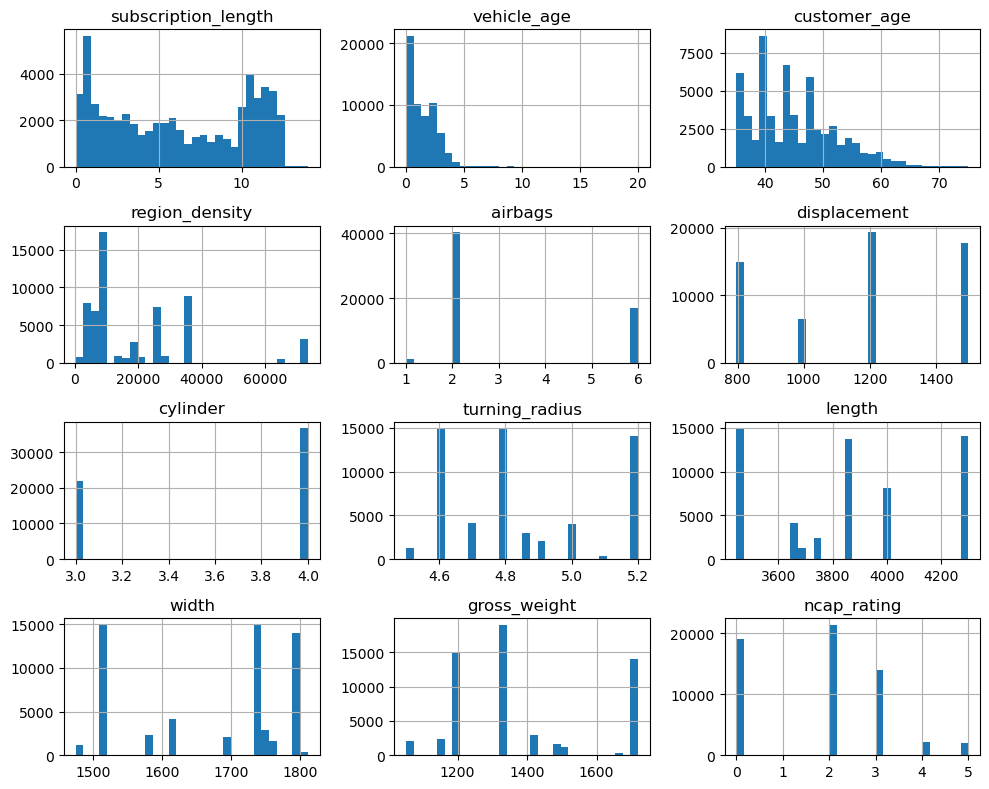

In [20]:
import matplotlib.pyplot as plt

# Histogram for all numeric columns
claims_df.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

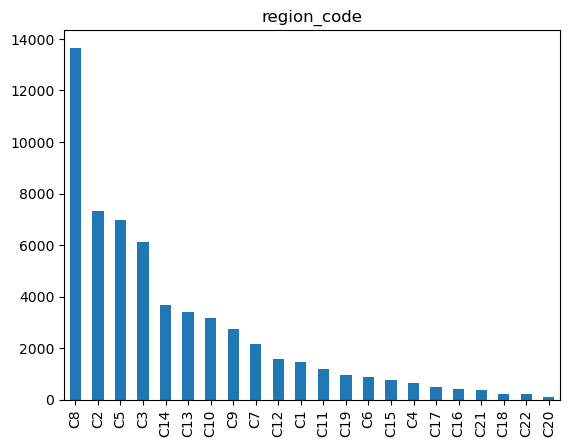

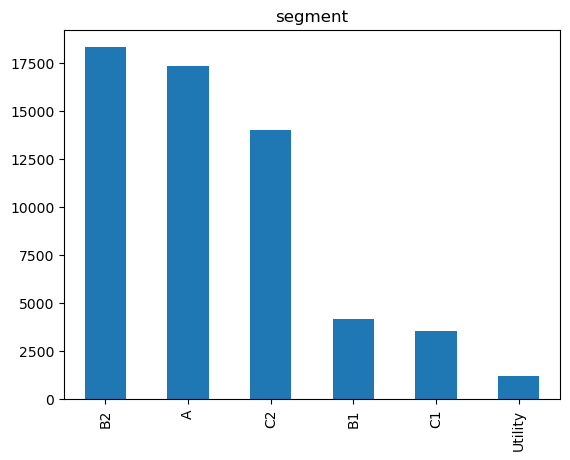

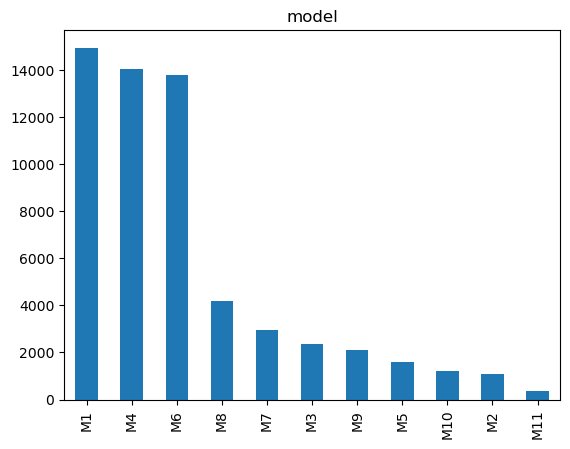

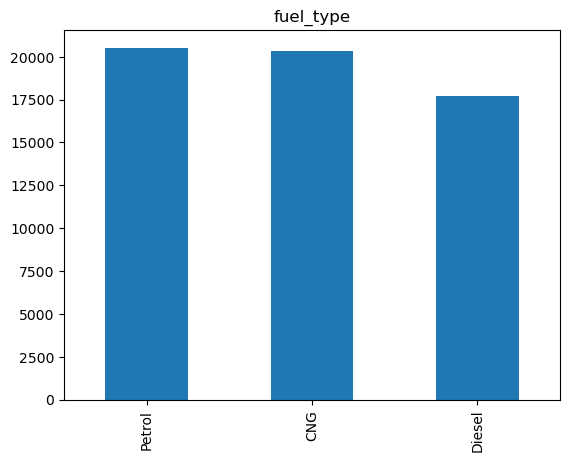

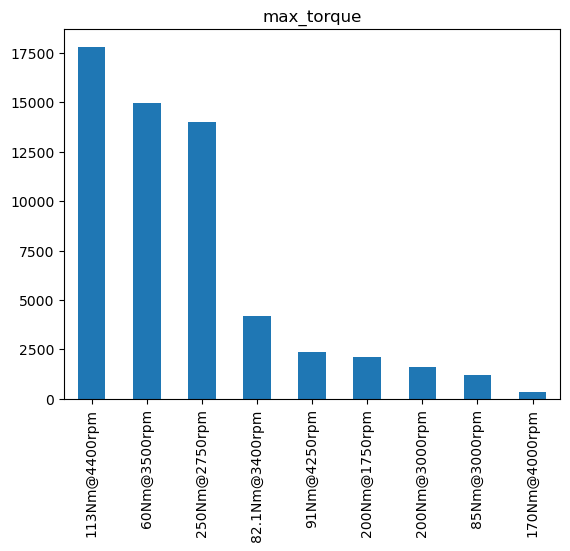

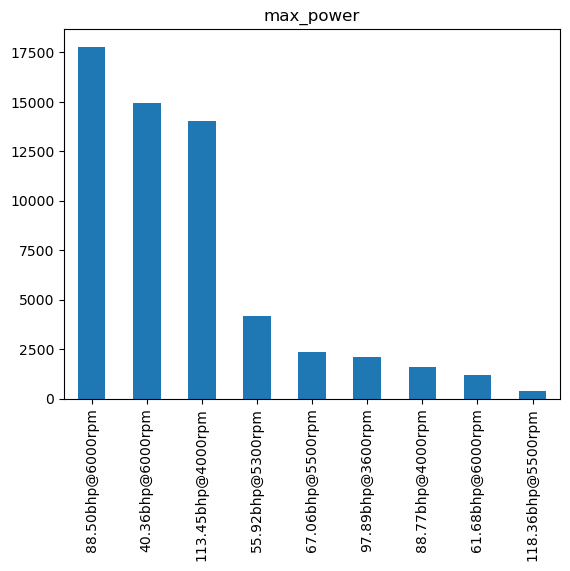

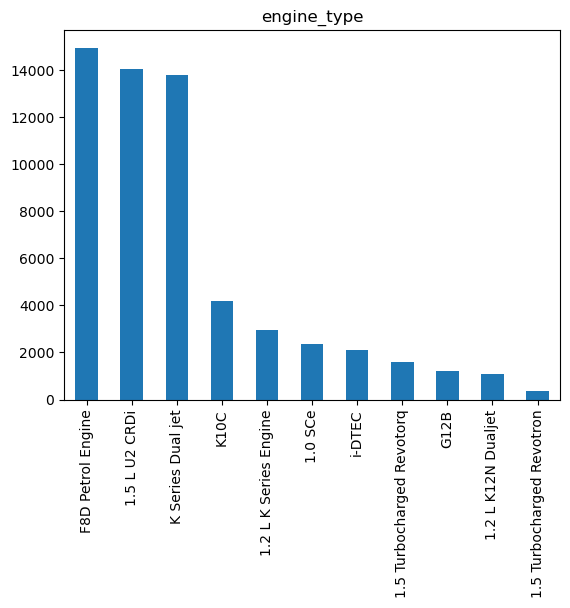

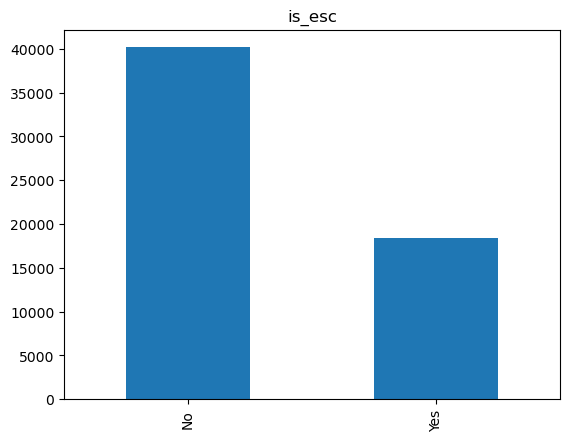

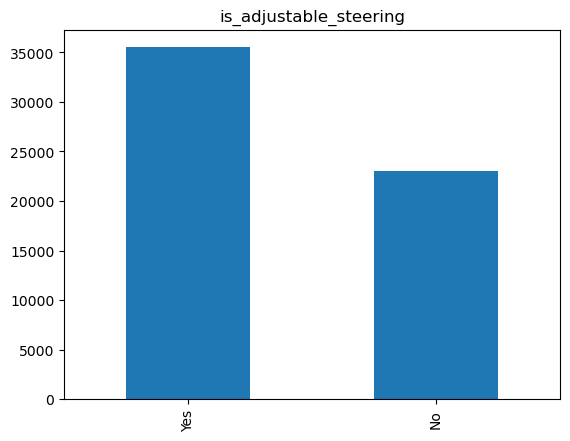

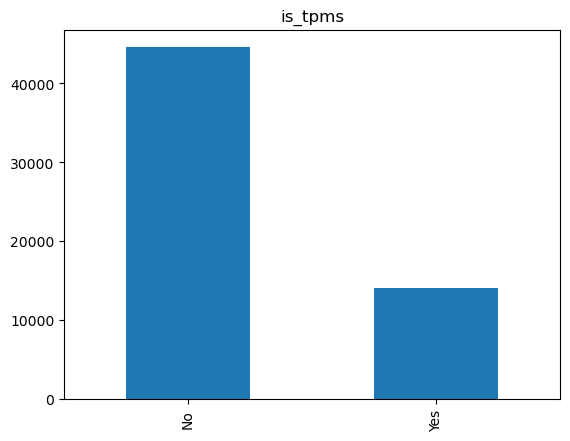

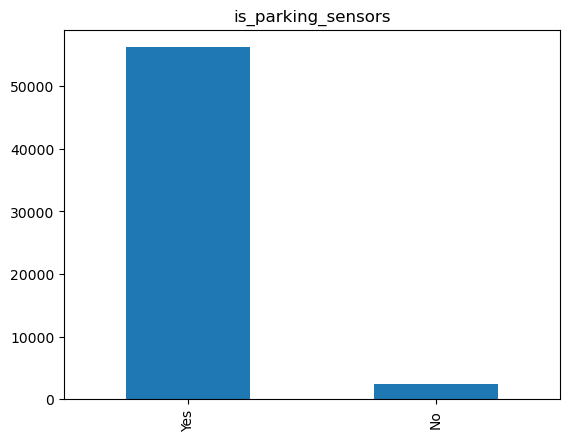

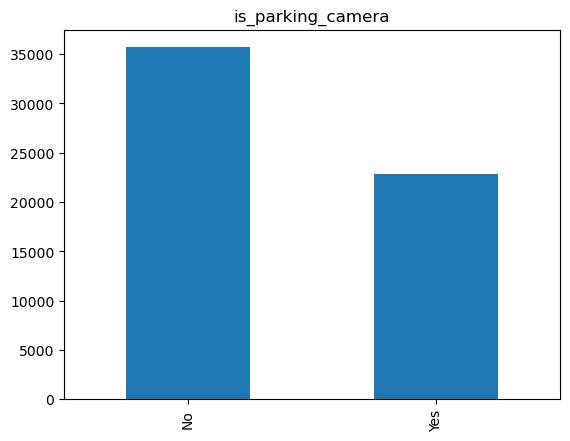

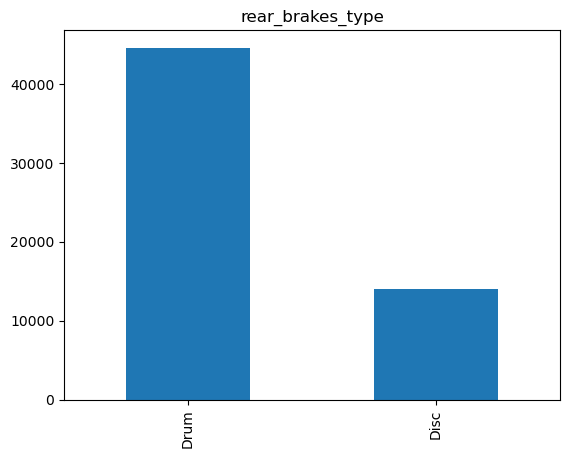

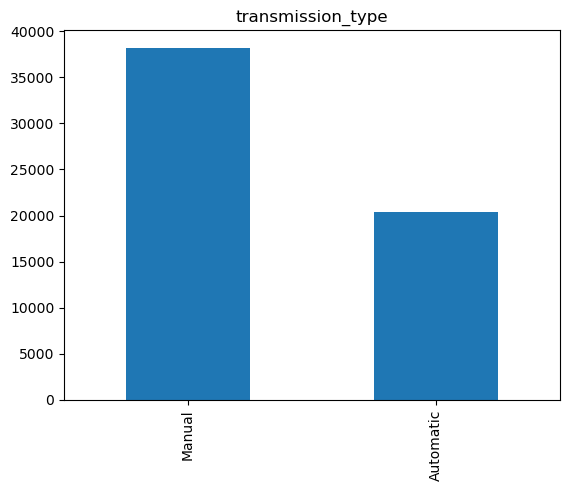

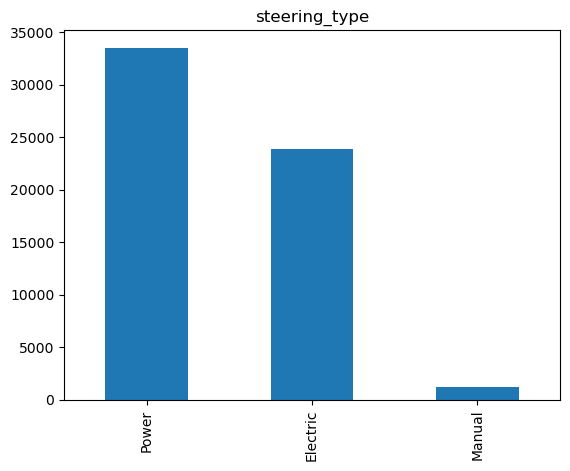

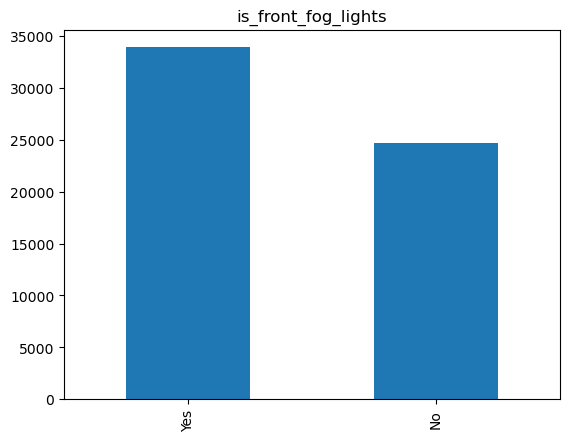

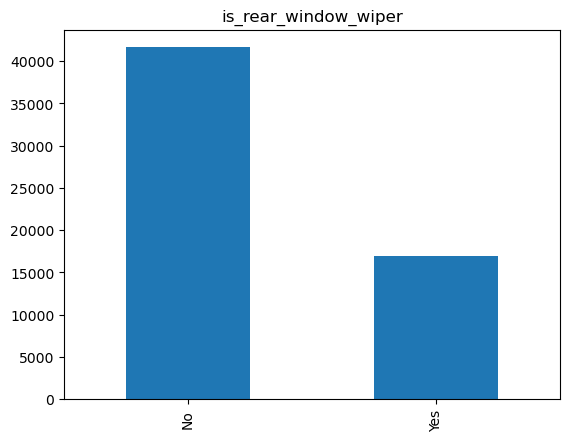

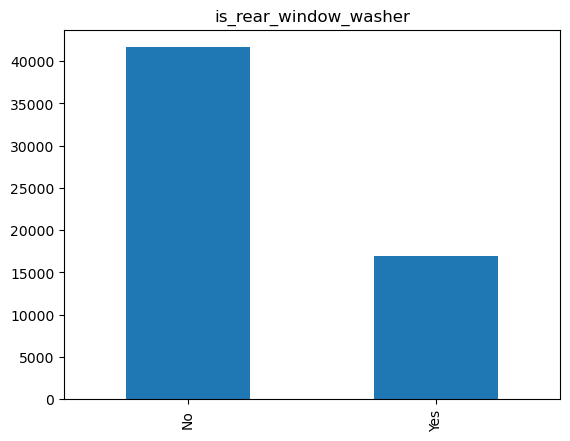

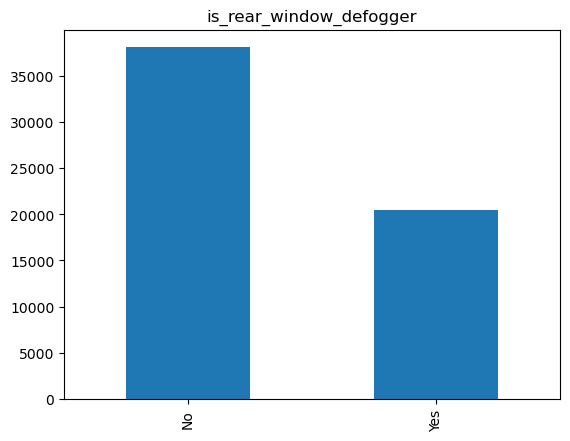

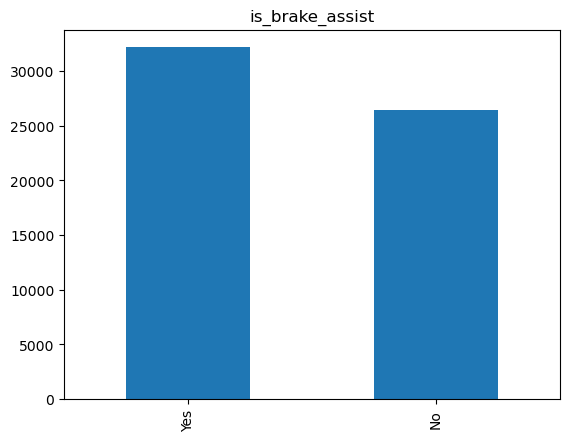

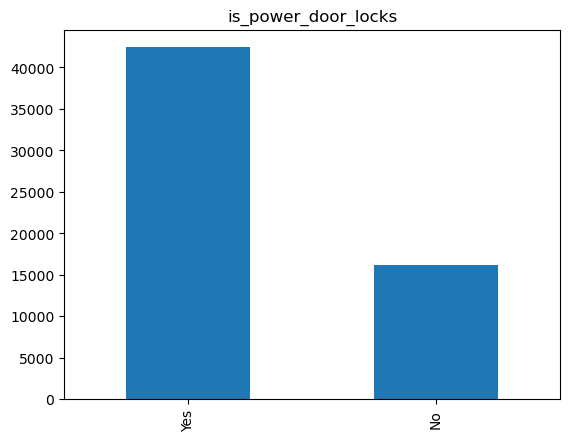

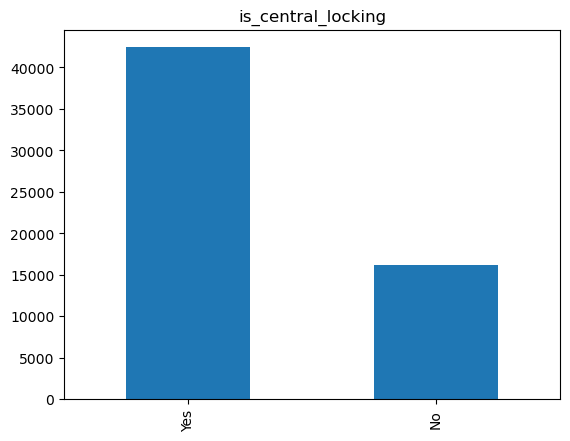

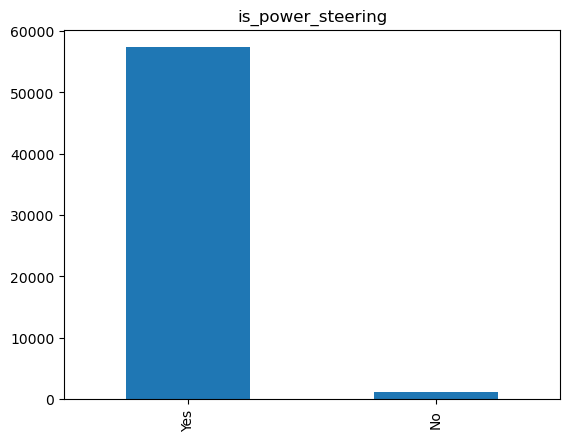

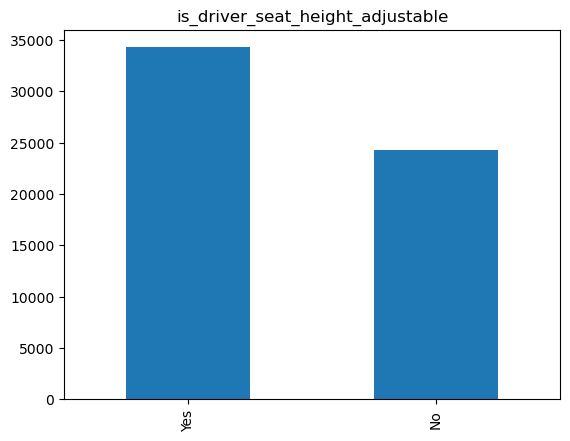

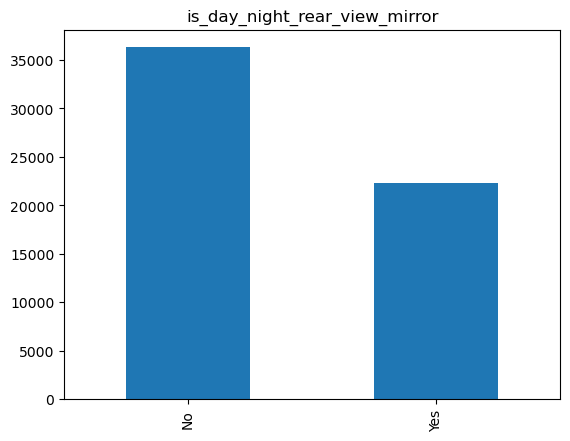

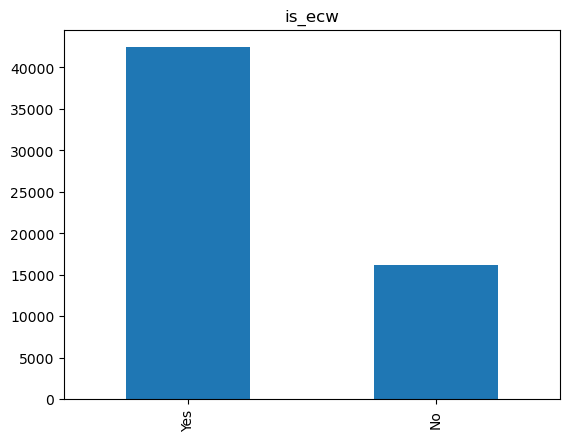

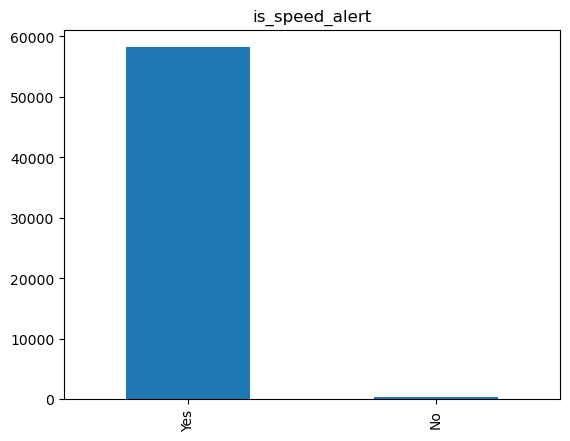

In [21]:
for col in claims_df.select_dtypes(include='object').columns:
    claims_df[col].value_counts().plot(kind='bar', title=col)
    plt.show()

### Step 3 Question 3: Check for Outliers

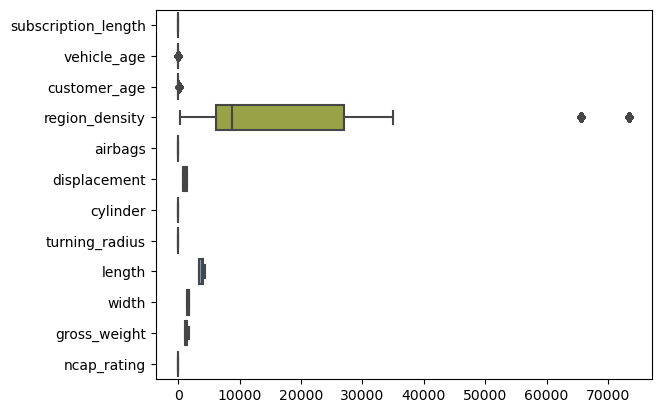

In [22]:
import seaborn as sns

# Box plot for all numeric columns
sns.boxplot(data=claims_df, orient='h')
plt.show()

### Step 3 Question 4: Check for Multicollinearity

In [40]:
encodable_features = ['region_code', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 
                     'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
                     'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
                     'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
                     'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable',
                     'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']

claims_df_encoded = pd.get_dummies(claims_df, columns=encodable_features, drop_first=True)

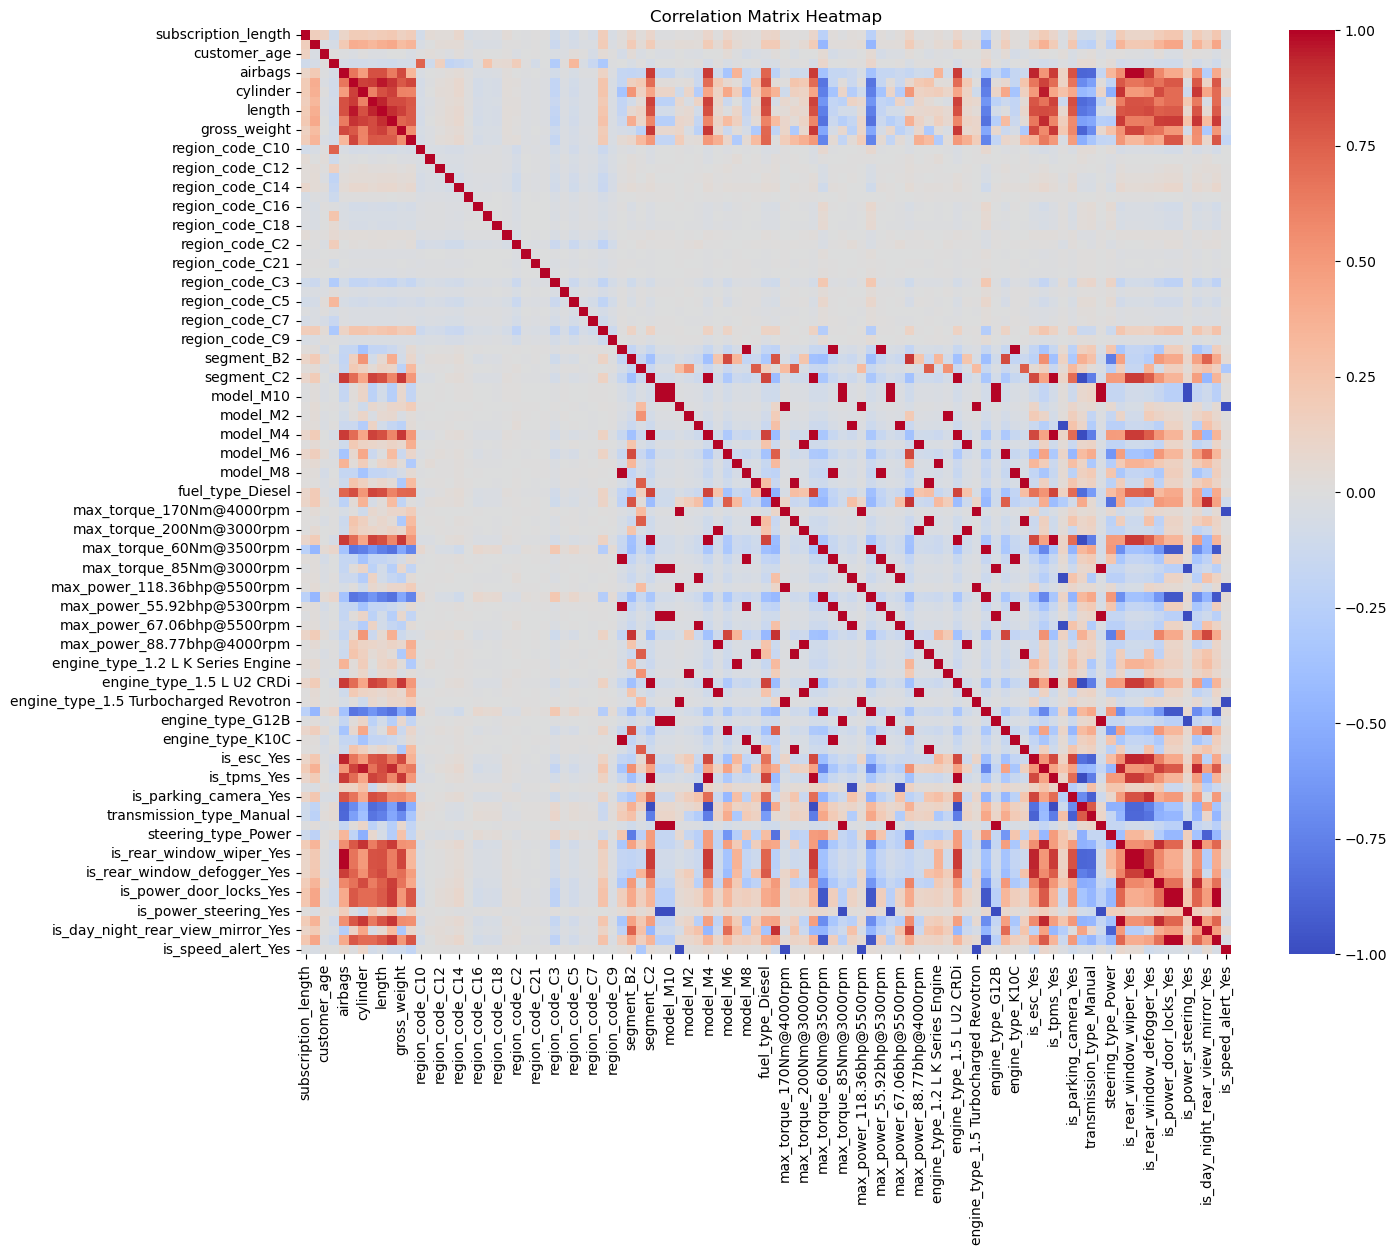

In [44]:
import seaborn as sns

correlation_matrix = claims_df_encoded.corr()
# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

This chart makes it difficult to immediately tell the correlations, but it does show us that there are many highly positively and negatively correlated values. Let's fine tune it to just focus on those.

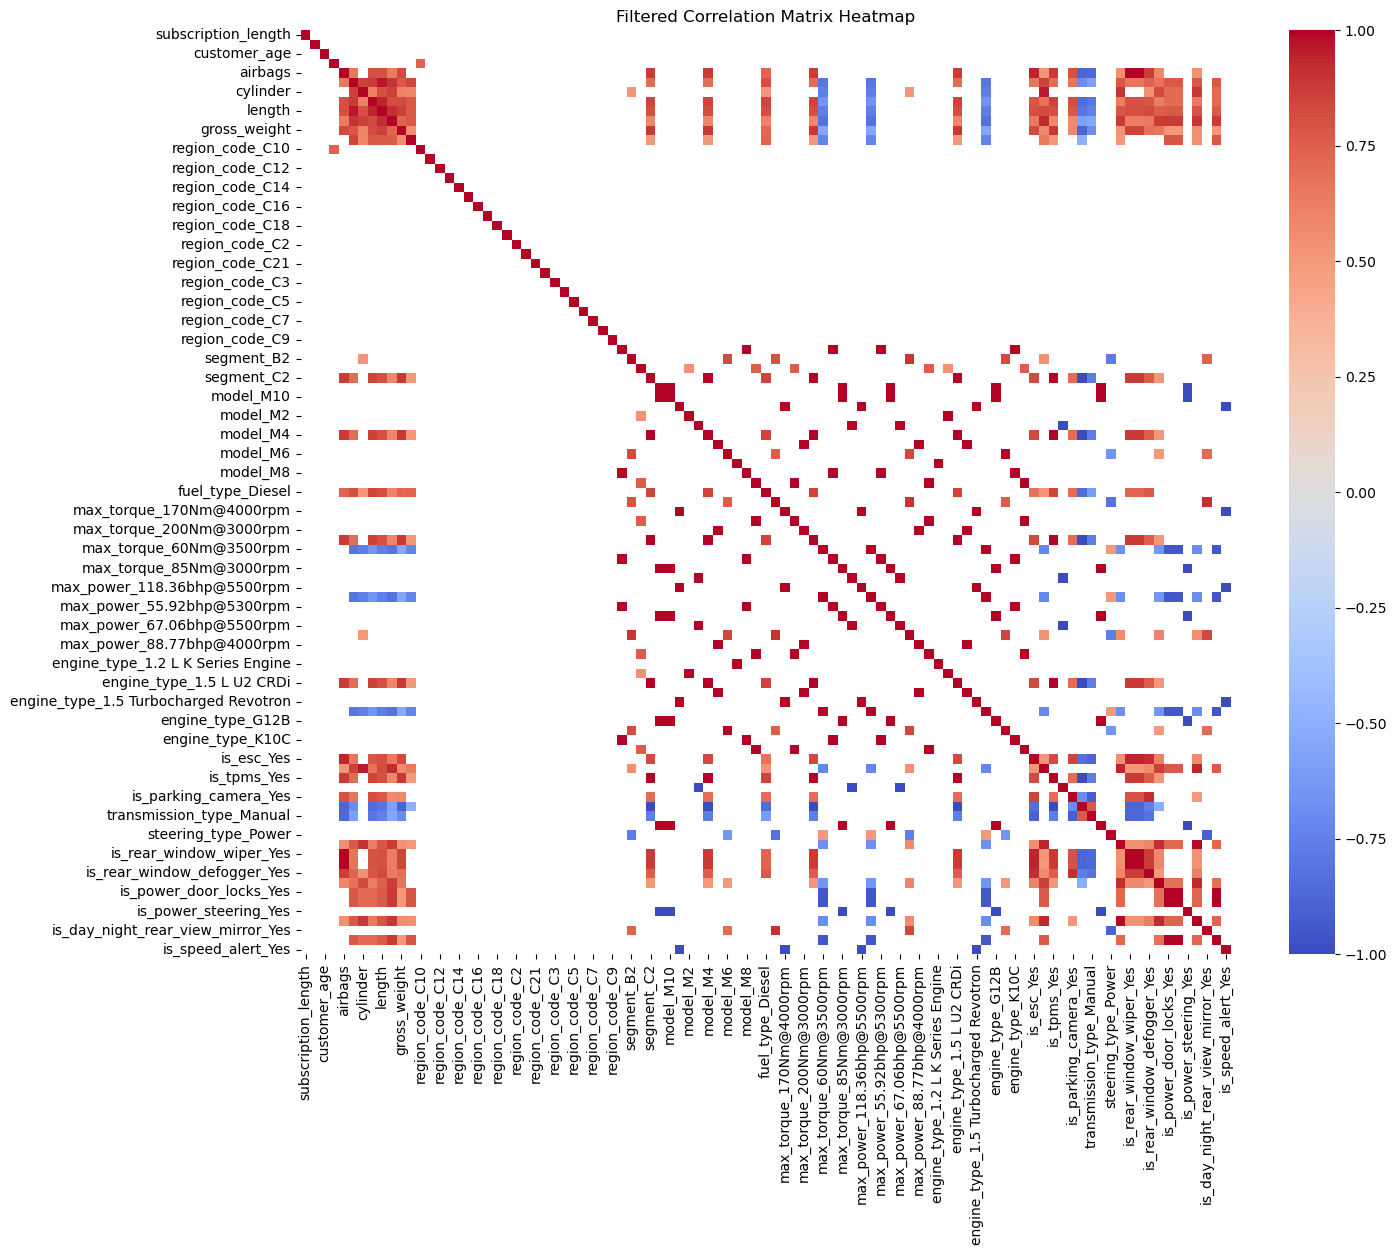

In [46]:
# Filter correlations greater than 0.5 or less than -0.5
filtered_corr = correlation_matrix.where((correlation_matrix > 0.5) | (correlation_matrix < -0.5))

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(filtered_corr, cmap='coolwarm')
plt.title('Filtered Correlation Matrix Heatmap')
plt.show()

We can see that there are tons of very positive/negative correlations among some features. For example;

is_rear_window_wiper_Yes and Airbags, is_rear_window_defogger_Yes and airbags. is_esc and cylinder. Looking at all of those categorical variables (binary ones if the feature exists or not), we can see that the majority of the time it is included, which makes the correlation extremely high or negative because it's often always included in these cases with these other features.

This will likely affect model performance for Logistic Regression. To counteract that we can use Regularization techniques, PCA, or even just dropping the columns.

## Step 3 Summary:

1. <b>Check for obvious flaws with data, nulls, missing values, etc.</b> There are no obvious flaws or contamination with the data, no nulls, missing values, etc.
2. <b>Check distributions of data.</b> All the distributions across each feature appear to be in line with what we expect, and no anomalies.
3. <b>Check for outliers.</b> Looking at boxplot data, only with region_density does there appear to be outliers, which might be due to a few policies being in major cities while others are not.
3. <b>Check for multicollinearity.</b> The correlation heatmaps show that there is a lot of collinearity between many features, but this makes sense because these features are almost always present.

# EDA Summary:

Data Quality: The data looks good from a quality perspective, there is no issues between nulls or missing/corrupt values. There may be a few outliers, but we should look at them closer before deciding what to do.

Data Characteristics: A lot of the data is highly correlated. It's a mix of binary categorical data and continous numeric features. We'll need to be careful in the modeling phase and try to reduce that with either PCA, Regularization or maybe even just throwing them out.